<a href="https://colab.research.google.com/github/mraniketr/ImageClassifier/blob/master/RGB_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

%load_ext tensorboard

TensorFlow 2.x selected.
2.1.0


In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.5040 - accuracy: 0.4522 - val_loss: 1.2589 - val_accuracy: 0.5417
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.1379 - accuracy: 0.5969 - val_loss: 1.0920 - val_accuracy: 0.6202
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.9845 - accuracy: 0.6560 - val_loss: 0.9486 - val_accuracy: 0.6674
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.8901 - accuracy: 0.6890 - val_loss: 0.9937 - val_accuracy: 0.6579
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.8158 - accuracy: 0.7149 - val_loss: 0.8883 - val_accuracy: 0.6914
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.7548 - accuracy: 0.7349 - val_loss: 0.8727 - val_accuracy: 0.7041
Epoch 7/10
50000/50000 [==============================] 

In [26]:
predictions = model.predict(test_images)
np.argmax(predictions[520])

5

In [27]:
(test_labels[520])

array([5], dtype=uint8)

dog


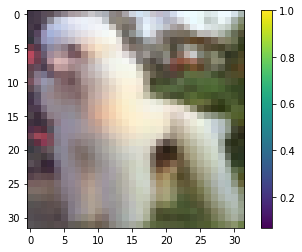

In [29]:
plt.figure()
plt.imshow(test_images[520])
print(class_names[5])
plt.colorbar()
plt.grid(False)
plt.show()